In [10]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('cereal.csv')

In [ ]:
The goal of this exploration is to understand this dataset containing information about 77 different cereals, for which each entry contains information along several nutritional dimensions, such as sodium, sugar, potassium, calories, and some other features.

Moreover, since this dataset also contains a rating field, its natural as a data scientist to think of it as a response variable that we are trying to predict using other features. 

So some natural questions to ask about this dataset are:

1)What nutritional fields seem to be highly correlated with the rating? For example, are ratings dictated more by factors that affect the flavor, such as sugars and fat, or factors that affect the cereals nutritional value, such as fiber, protein, or vitamins?

2)On the other hand, what features are probably irrelevant to the rating? Is it reasonable to expect weight, cups, and shelf to have some bearing on the cereals rating?

3)From this list of 77 cereals, what cereals rank the best according to rating? What cereals rank worst? Do these rankings make sense according to pop-culture wisdom?

4)What can these answers tell us about health-trends? Are we shifting towards healthier diets with current health-crazes?


In [15]:
#Get a feel for the data - are there missing values? What are some descriptive statistics of each field?
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
A useful way to visualize relationships between the features of the dataset is by plotting a heatmap of the correlation matrix of the dataset

<AxesSubplot:>

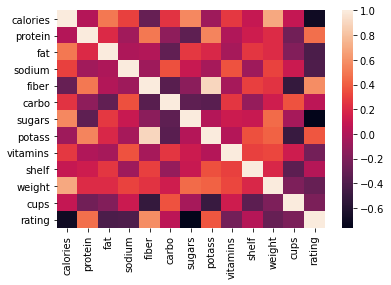

In [14]:
sns.heatmap(df.corr())

In [ ]:
We can immediately see some interesting relationships within the dataset - notice the grid cells for rating/sugar and rating/calories - theyre darkly colored, and according to the color map, extremely dark cells correspond to negative correlation.

In [ ]:
We can verify this by individually plotting scatter plots for each of these variable pairs:

In [23]:
#We first define a function, 'plot_features' which we can reuse to visualize different feature relationships
def plot_features(feature1, feature2, df):
    plt.scatter(df[feature1], df[feature2], marker='.')
    plt.title(f'{feature2} vs {feature1}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

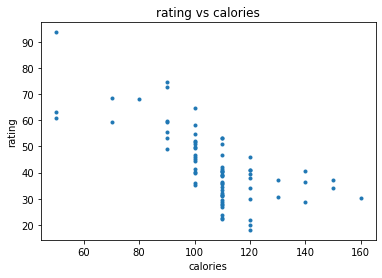

In [24]:
plot_features('calories', 'rating', df)

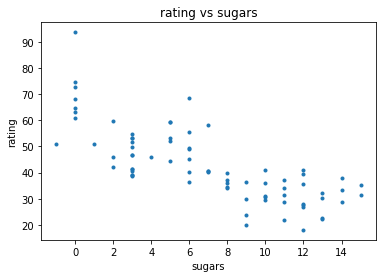

In [25]:
plot_features('sugars', 'rating', df)

In [ ]:
Excellent! We can see some negative correlation from both the plots. 

What can we infer from that though? 

It makes sense that calories might be associated with lower ratings - in the weight-conscious society we live in, were constantly striving for low calorie foods. Its understandable that customers may want to penalize cereals that are on the higher end of the calorie scale, or the sugar scale. But this also brings up an interesting point - customers seem to be basing their ratings not just on the taste of the cereal, but are also incorporating nutritional aspects of the cereal into their ratings as well. Perhaps the rating is some weighted average of the :
1)Taste/flavor of the cereal
2)The overall healthiness of the cereal

We might be able to get more insight about this by looking at the top ranked cereals later!

In [ ]:
Now, lets see if theres a relationship between weight, shelf, and cups against rating. We expect the data to be entirely randomly scattered, but we may be surprised - perhaps there is some unintuitive correlation, either by chance, or because the variable is correlated with another variable that is correlated with the rating.

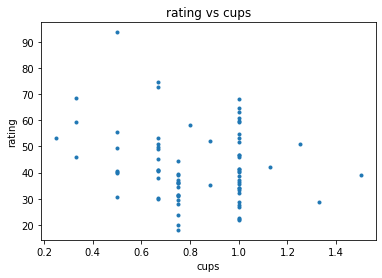

In [27]:
plot_features('cups', 'rating', df)

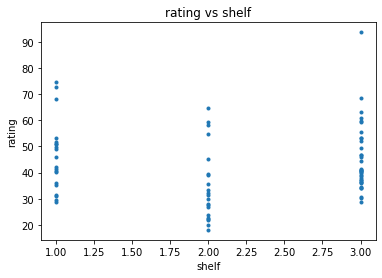

In [28]:
plot_features('shelf', 'rating', df)

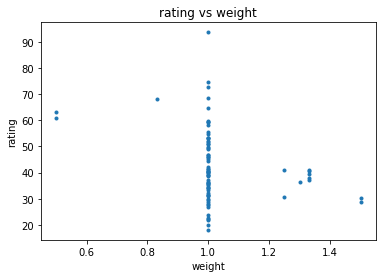

In [29]:
plot_features('weight', 'rating', df)

In [ ]:
These plots seem to corroborate our hypotheses that weight, cups, and shelf have no bearing on the rating. If we look at the cups vs rating plot, the data is randomly distributed across the plot.

The weight and shelf fields seem fairly discretized, and even within each discrete group, the data seems to be randomly spread, spanning from low to high ratings. 

This would generally fit our intuition - its unlikely that these features would have an influence on our rating, because they dont directly influence aspects of the cereal such as flavor or nutritional value

In [ ]:
Finally, now to the more interesting question - which cereals rank the best according to rating? Are they the expected fan-favorites? Do we see some surprising contenders at the top? What about the lowest ranked cereals? Are you going to see your favorite cereal as a child shamelessly lingering at the bottom amongst other unworthy cereals?

Text(0.5, 0, 'Rating')

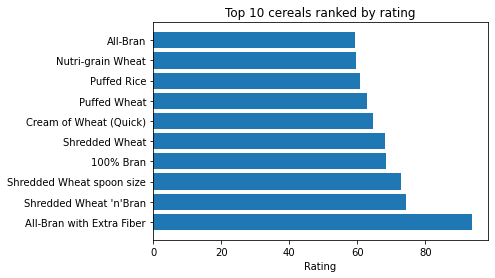

In [34]:
#First, lets sort the cereal dataframe by rating
sorted_df = df.sort_values('rating', ascending=False)
#Find the top 10 and plot a horizontal bar chart
top_10 = sorted_df.iloc[:10]
plt.barh(top_10['name'], top_10['rating'])
plt.title('Top 10 cereals ranked by rating')
plt.xlabel('Rating')

Text(0.5, 0, 'Rating')

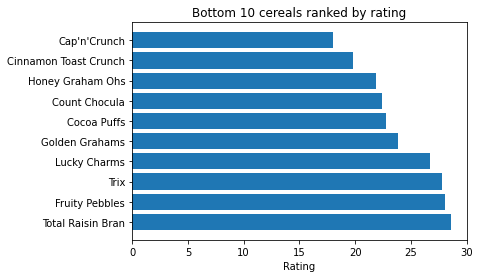

In [35]:
#Find the bottom 10 and plot a horizontal bar chart
bottom_10 = sorted_df.iloc[-10:]
plt.barh(bottom_10['name'], bottom_10['rating'])
plt.title('Bottom 10 cereals ranked by rating')
plt.xlabel('Rating')

In [ ]:
These are extremely interesting findings - looks like the more healthy cereals have rated the best, whereas the popular sugary and chocolately cereals have rated the worst. For example, Cinnamon Toast Crunch is widely considered one of the tastiest cereals on the market, yet it finds its way in our list of the bottom 10. In fact, almost all of the cereal names in the bottom 10 should be familiar to everyone - theyre highly commercialized, popular cereals that most children grew up with. 

Just from the names of the cereals in the top 10, we can tell that theyre health-oriented options. 4 of the 10 options are bran themed cereals, and 6 of the 10 options are wheat themed, and we know that bran and wheat are considered healthier ingredients for a cereal. 


In [ ]:
2 key findings weve been able to extract from this dataset are:

1)Customers tend to penalize cereal brands that overuse sugars or are high in calories, as we noted from the negative correlations between calories/rating and sugars/rating
2)The top 10 ranked cereals categorically only included healthy cereal options that use wheat or bran as major ingredients, whereas the bottom 10 ranked cereals included the popular sugary and chocolately cereals. 

From these findings, we might reasonably conclude that trends indeed seem to be towards highly nutritional, healthier foods. The fact that people are rating healthier cereals better than the traditional tasty cereals seems to indicate a shift in priorities - customers seem to value highly nutritional foods over junkier foods.